In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd

# Underfitting and overfitting
## Decision tree classifier

In [2]:
titanic = pd.read_csv('titanic.csv')

titanic = titanic.drop(columns=['Name']) # drop the column 'Name'
is_F = (titanic['Sex']=='female') # array of True and False
titanic['Sex'] = is_F.astype(int) # 1 = female, 0 = male
train = titanic.sample(frac=0.8) # 80% rows for training
test = titanic.drop(index=train.index)

y_train = train['Survived']
X_train = train.drop(columns=['Survived'])
print(X_train.shape, y_train.shape)

y_test = test['Survived']
X_test = test.drop(columns=['Survived']) 
print(X_test.shape, y_test.shape)

(710, 6) (710,)
(177, 6) (177,)


### Let's fit two trees: one with `max_depth=2` and the other with `max_depth=20`. 

In [3]:
from sklearn import tree

T2 = tree.DecisionTreeClassifier(max_depth=2)
T20 = tree.DecisionTreeClassifier(max_depth=20)

T2.fit(X_train, y_train)
T20.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

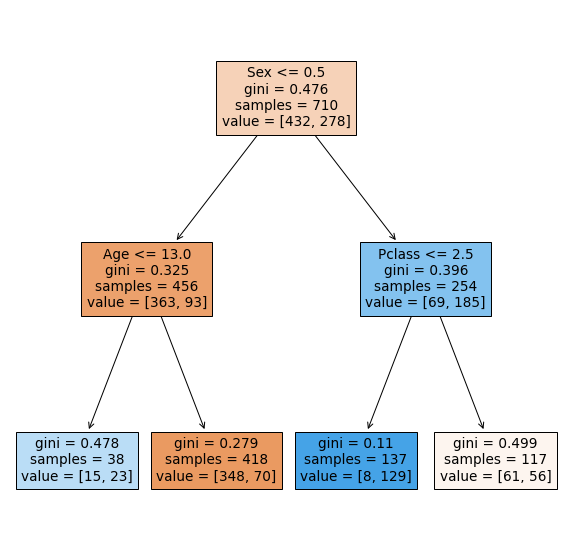

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree(T2, 
                   filled=True, 
                   feature_names=X_train.columns)

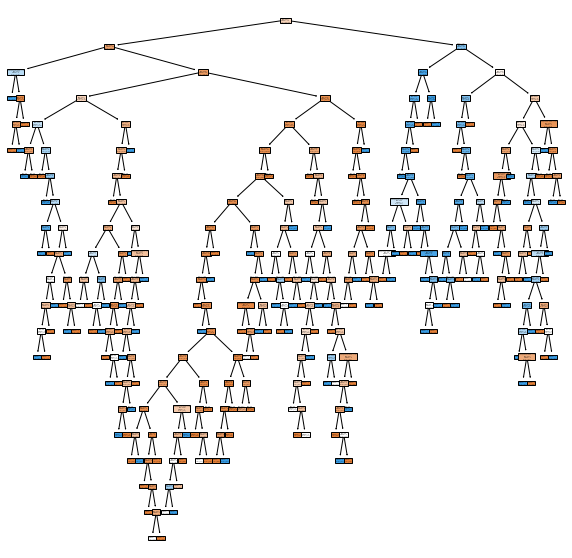

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 10))
p = tree.plot_tree(T20, 
                   filled=True, 
                   feature_names=X_train.columns)

### Evaluate depth 2 tree and depth 20 tree

We see that the training accuracy of the depth-2 tree is lower than that of the depth-20 tree, while the test accuracy of the depth-2 tree is higher.

In [6]:
print('max_depth 2')
print('Train score:',T2.score(X_train, y_train))
print('Test score:',T2.score(X_test, y_test))
print()
print('max_depth 20')
print('Train score:',T20.score(X_train, y_train))
print('Test score:',T20.score(X_test, y_test))

max_depth 2
Train score: 0.7901408450704225
Test score: 0.7966101694915254

max_depth 20
Train score: 0.9830985915492958
Test score: 0.7909604519774012


### Investigate how the tree's `max_depth` affects training and test performance by varying the depth from 1 to 30.

As the depth of the tree increases from 1 to 30, training accuracy (in blue) consistently improves and eventually reaches 100%, indicating that deeper trees can perfectly fit the training data. In contrast, test accuracy (in orange) initially increases slightly but then fluctuates and generally declines as depth increases. This figure illustrates overfitting: deeper trees capture noise in the training data, resulting in reduced generalization performance on unseen data.

Text(0, 0.5, 'Accuracy')

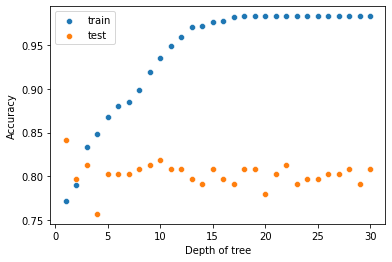

In [7]:
depths = range(1, 31)
train_scores = []
test_scores = []

for depth in depths:
    T = tree.DecisionTreeClassifier(max_depth=depth, criterion='gini')
    T.fit(X_train, y_train)
    train_scores.append(T.score(X_train, y_train))
    test_scores.append(T.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=depths, y=train_scores, label='train')
sns.scatterplot(x=depths, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')


## Polynomial regression

Let's simulate the data points for this example. We assume the following linear relationship: $Y=X+1 + 0.2\epsilon$, where $\epsilon \sim \mathcal{N}(0,1)$. 

In [8]:
# controls random number generation
# always get the same data
np.random.seed(1234) 

# true model is linear with a = 1 and b = 1
a = 1
b = 1

n_points = 100

X = np.random.rand(n_points)
Y = a*X + b + 0.2*np.random.randn(n_points) # final term is random noisea

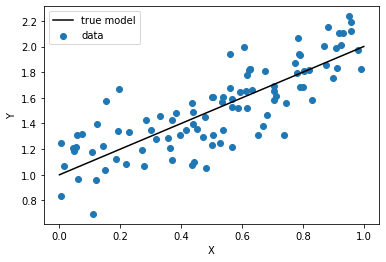

In [9]:
fig, ax = plt.subplots(1)

ax.plot([0,1], [1, 2], color = "black", label = "true model")
ax.scatter(X, Y, label = "data")
ax.set(xlabel='X', ylabel='Y')
plt.legend()

### Fit the model 

train test split

In [10]:
df = pd.DataFrame(data={'Y': Y, 'X': X})
train = df.sample(frac=0.8) # 80% rows for training
test = df.drop(index=train.index) # rest of rows for testing
print(train.shape, test.shape)

(80, 2) (20, 2)


In [11]:
y_train = train['Y']
X_train = train.drop(columns=['Y'])
print(X_train.shape, y_train.shape)

y_test = test['Y']
X_test = test.drop(columns=['Y']) 
print(X_test.shape, y_test.shape)

(80, 1) (80,)
(20, 1) (20,)


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

#### Fit two polynomial regression models to the training data: one using a degree-1 polynomial (simple linear model) and the other using a degree-20 polynomial (more complex model).

In [13]:
model1 = PolynomialRegression(1)
model1.fit(X_train, y_train)
model2 = PolynomialRegression(20)
model2.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=20)),
                ('linearregression', LinearRegression())])

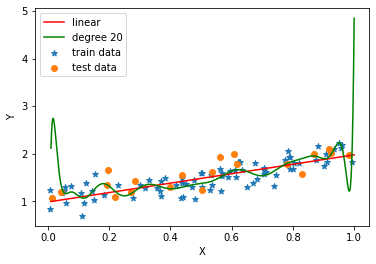

In [14]:
prediction_inputs = pd.DataFrame(data={'X': np.linspace(0.01, 1, 1000)})

fig, ax = plt.subplots(1)

ax.plot(prediction_inputs, model1.predict(prediction_inputs), color = "red", label = "linear")
ax.plot(prediction_inputs, model2.predict(prediction_inputs), color = "green", label = "degree 20")

ax.scatter(X_train, y_train, marker='*', label = "train data")
ax.scatter(X_test, y_test, label = "test data")

ax.set(xlabel='X', ylabel='Y')
plt.legend()

Model 1 fits a simple straight line to the data. It doesn't perfectly capture the training data, but it generalizes reasonably well to test data.

Model 2 fits a very complex curve, so it does better on the training set than the simple linear model. But it overfits — it captures the noise in the training data rather than the true underlying pattern. Therefore, its predictions on the test data are worse than just predicting the mean, as we can see from the negative R-squared. 

In [15]:
print('model 1 with degree 1 (linear)')
print('Train score:',model1.score(X_train, y_train))
print('Test score:',model1.score(X_test, y_test))
print()
print('model 2 with degree 20')
print('Train score:',model2.score(X_train, y_train))
print('Test score:',model2.score(X_test, y_test))


model 1 with degree 1 (linear)
Train score: 0.6723254715066838
Test score: 0.5889557948733521

model 2 with degree 20
Train score: 0.7705361982277212
Test score: -0.6575648713389288


Text(0, 0.5, '$R^2$ score')

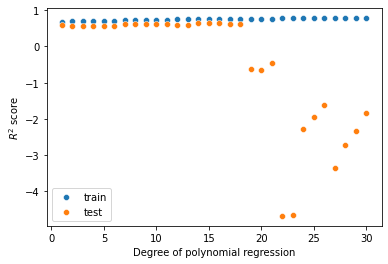

In [16]:
degrees = range(1, 31)
train_scores = []
test_scores = []

for degree in degrees:
    lr = PolynomialRegression(degree).fit(X_train, y_train)
    train_scores.append(lr.score(X_train, y_train))
    test_scores.append(lr.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=degrees, y=train_scores, label='train')
sns.scatterplot(x=degrees, y=test_scores, label='test')
ax.set_xlabel('Degree of polynomial regression')
ax.set_ylabel('$R^2$ score')